In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
TSLA = yf.download('TSLA', start='2022-11-29', end='2022-11-30',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [3]:
TSLA

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-11-29 09:30:00-05:00,184.990005,185.750000,184.486206,185.469894,185.469894,2463396
2022-11-29 09:31:00-05:00,185.490005,185.669998,184.180099,184.447006,184.447006,527813
2022-11-29 09:32:00-05:00,184.455704,184.529999,183.399994,183.429993,183.429993,563267
2022-11-29 09:33:00-05:00,183.429901,184.649994,183.350006,183.429993,183.429993,486255
2022-11-29 09:34:00-05:00,183.389999,184.000000,183.110001,183.389999,183.389999,444311
...,...,...,...,...,...,...
2022-11-29 15:55:00-05:00,180.479996,180.789993,180.460007,180.735001,180.735001,271720
2022-11-29 15:56:00-05:00,180.740005,181.000000,180.692001,180.940094,180.940094,258644
2022-11-29 15:57:00-05:00,180.945007,180.949997,180.729996,180.789993,180.789993,196386


In [4]:
AAPL = yf.download('AAPL', start='2022-11-29', end='2022-11-30',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [5]:
AAPL

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-11-29 09:30:00-05:00,144.289993,144.389999,143.619995,143.779999,143.779999,2079979
2022-11-29 09:31:00-05:00,143.809998,144.009995,143.809998,143.990005,143.990005,273456
2022-11-29 09:32:00-05:00,144.000000,144.020004,143.839996,143.860001,143.860001,251932
2022-11-29 09:33:00-05:00,143.850006,144.139999,143.850006,143.960007,143.960007,304388
2022-11-29 09:34:00-05:00,143.949997,144.050003,143.880005,143.979996,143.979996,235158
...,...,...,...,...,...,...
2022-11-29 15:55:00-05:00,140.940002,141.199997,140.919998,141.179993,141.179993,577820
2022-11-29 15:56:00-05:00,141.179993,141.339996,141.160004,141.285507,141.285507,495384
2022-11-29 15:57:00-05:00,141.285004,141.289993,141.160004,141.225006,141.225006,451306


In [6]:
S1_0 = TSLA['Open'][0]
S2_0 = AAPL['Open'][0]

In [7]:
S1_0

184.99000549316406

In [8]:
S2_0

144.2899932861328

In [9]:
lr1 = np.log(TSLA['Adj Close'] / TSLA['Adj Close'].shift(1))
lr2 = np.log(AAPL['Adj Close'] / AAPL['Adj Close'].shift(1))
mu_1 = lr1.mean() * 390
mu_2 = lr2.mean() * 390
sigma_1 = lr1.std() * np.sqrt(390)
sigma_2 = lr2.std() * np.sqrt(390)
rho = lr1.corr(lr2)
z_0 = 0.00
gamma = 0.5
delta = 0.8
T = 1
M = len(TSLA)

In [10]:
result = linregress(np.log(TSLA['Adj Close']), np.log(AAPL['Adj Close']))
beta = result.slope

In [11]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))

In [12]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = TSLA['Adj Close'][t-1]
    S2[t] = AAPL['Adj Close'][t-1]

Text(0.5, 1.0, 'Stock Price')

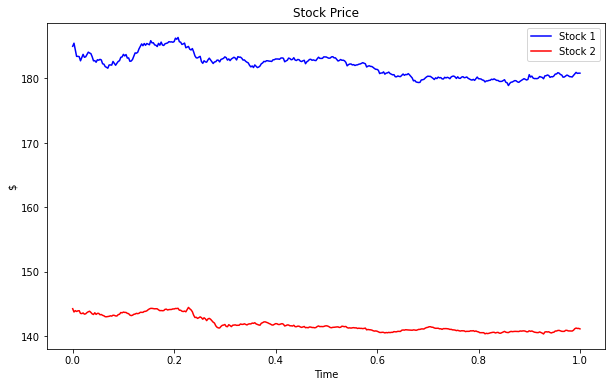

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='Stock 1')
plt.plot(tt, S2, 'r', lw=1.5, label='Stock 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Stock Price')

Text(0.5, 1.0, 'z')

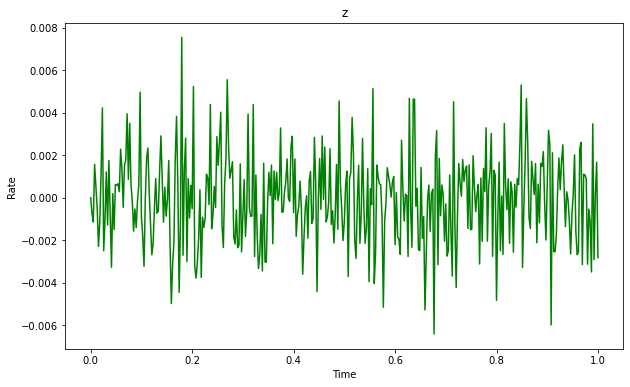

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z')

In [15]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))

Optimal Weights

Text(0.5, 1.0, 'Weights')

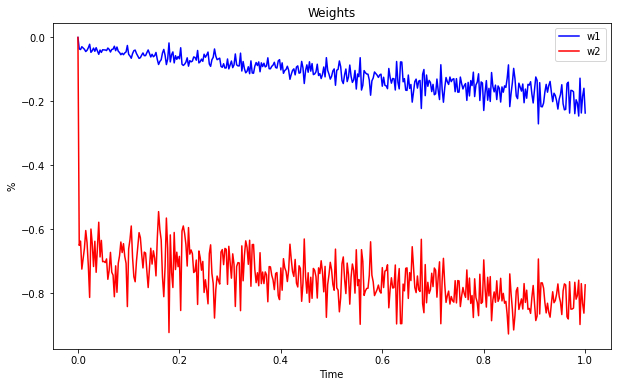

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Optimal Wealth Process - Negative means selling and you get cash

Text(0.5, 1.0, 'Cash')

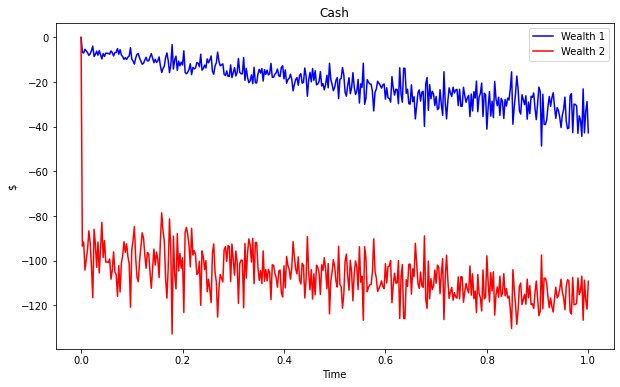

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Wealth 1')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Wealth 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cash')

In [18]:
Wealth = abs(Pi_1 * S1) + abs(Pi_2 * S2)

Text(0.5, 1.0, 'Wealth')

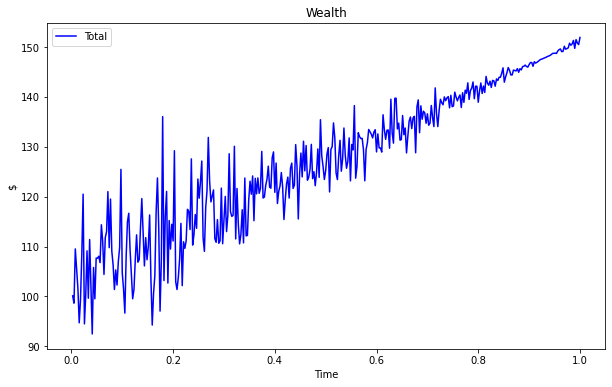

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], Wealth[1:], 'b', lw=1.5, label='Total')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

Inital Wealth

In [20]:
Wealth[1]

array([100.11865394])

Ending Wealth

In [21]:
Wealth[-1]

array([151.91892521])

Return

In [22]:
(Wealth[-1] - Wealth[1])/Wealth[1]

array([0.51738881])